In [5]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     - -------------------------------------- 0.2/8.4 MB 6.9 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.4 MB 16.0 MB/s eta 0:00:01
     ------------- -------------------------- 2.9/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.2/8.4 MB 20.6

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Leitura e tratamento

In [11]:
houses = pd.read_csv('usa_housing.csv')

In [12]:
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
houses.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

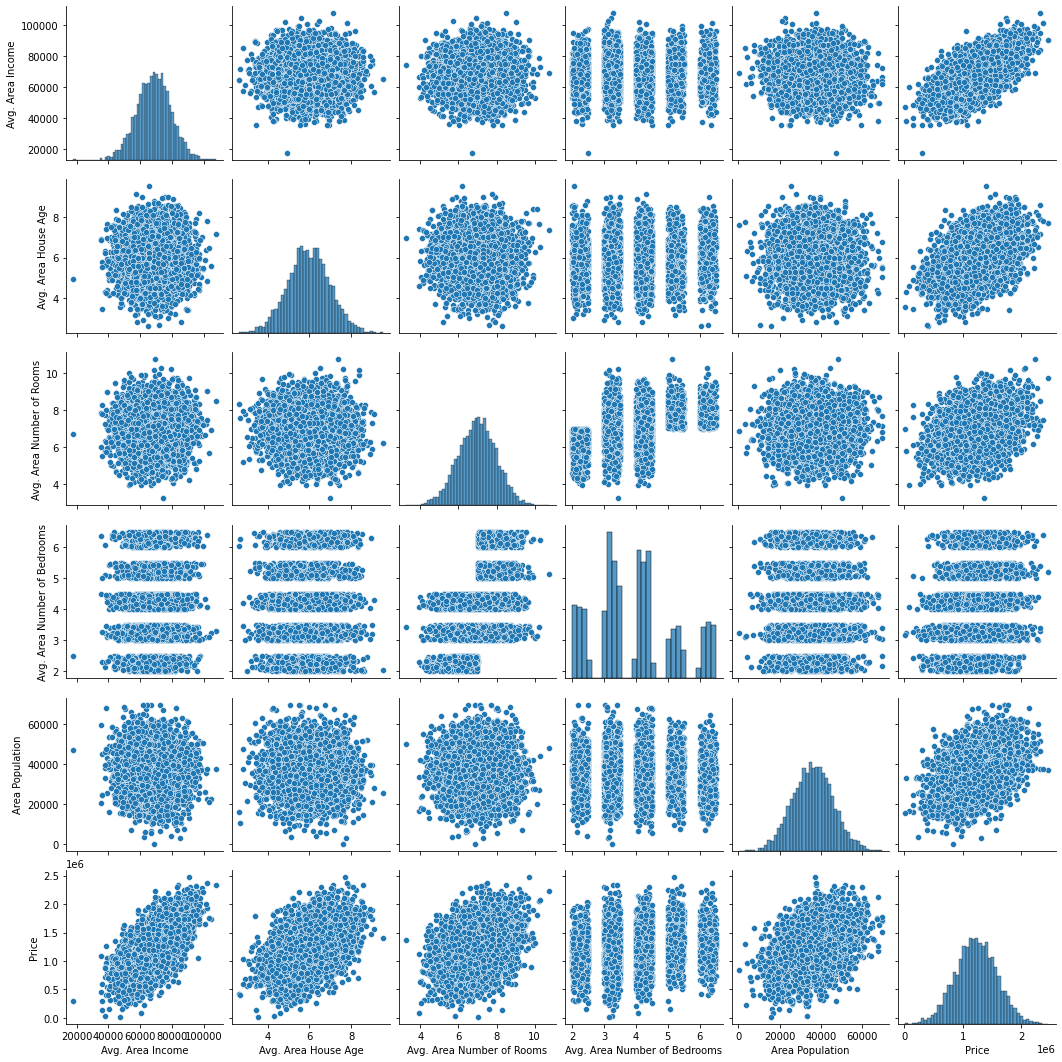

In [11]:
sns.pairplot(houses)

In [12]:
houses.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [13]:
modelo = LinearRegression()
X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = houses['Price']

In [17]:
var1, var2, var3 = (10, 3, 4)

In [21]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [30]:
x_teste

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1501,61907.593345,7.017838,6.440256,43828.947207
2586,57160.202243,6.893260,6.921532,43467.147035
2653,70190.796445,6.745054,6.662567,29215.136112
1055,69316.796889,6.300409,7.873576,24448.211461
705,72991.481649,3.412866,6.494081,50626.495426
...,...,...,...,...
4141,81054.509522,7.609819,5.536175,45684.341532
3168,88603.208776,7.097177,5.232616,37215.669643
2478,70085.947604,4.435761,7.131110,51446.691846
4214,53793.176477,6.461261,6.800895,43458.001774


In [31]:
modelo.fit(x_treino, y_treino)

LinearRegression()

In [32]:
y_pred = modelo.predict(x_teste)

In [34]:
y_teste

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
4141    1.730103e+06
3168    1.675702e+06
2478    1.440909e+06
4214    1.047280e+06
4180    1.084763e+06
Name: Price, Length: 1250, dtype: float64

In [33]:
y_pred

array([1309370.80566371, 1238505.70739624, 1248216.50168902, ...,
       1258980.98834532, 1079534.38045171, 1256969.41445234])

In [35]:
r2_score(y_teste, y_pred)

0.9169930165738731

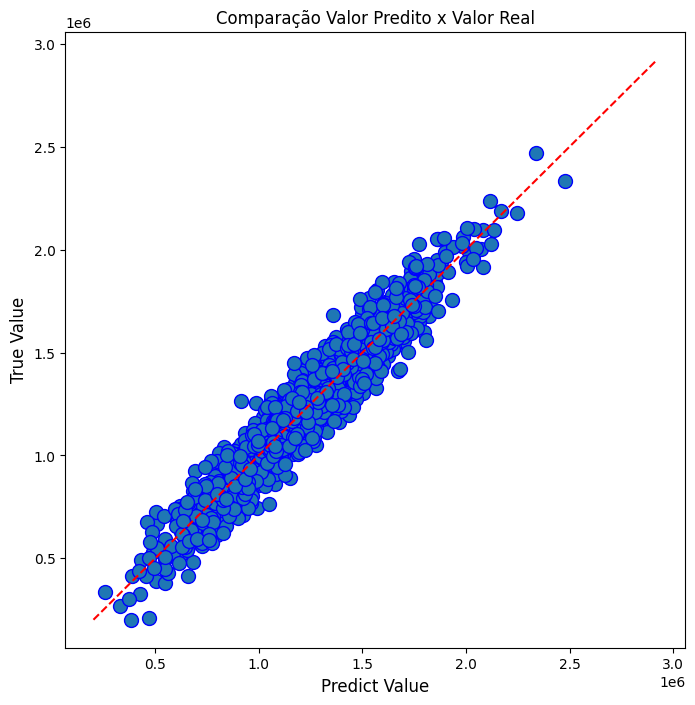

In [36]:
## define tamanho da figura
fig = plt.figure(figsize=(8,8))

# Configurações do plot
l = plt.plot(y_pred, y_teste, 'bo') # Define os eixos x e y. O argumento 'bo' indica que queremos que os elementos
                                    # apareçam como circulos azuis
plt.setp(l, markersize=10)          # Aqui definimos o tamanho dos circulos
plt.setp(l, markerfacecolor='C0')   # Aqui definimos a cor do contorno

## Titulo e eixos
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

## Aqui definimos a equação da reta de aproximação e adicionamos ela no plot
xl = np.arange(min(y_teste), 1.2*max(y_teste),(max(y_teste)-min(y_teste))/10)
yl = xl
plt.plot(xl, yl, 'r--')

## Exibição
plt.show()

In [37]:
mean_absolute_error(y_teste, y_pred)

80865.05205254286

In [40]:
mean_squared_error(y_teste, y_pred)

9937947034.230518

In [41]:
insurance = pd.read_csv('insurance.csv')

In [42]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Leitura do dataset

In [43]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report

In [44]:
penguins = sns.load_dataset('penguins')

In [45]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [50]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [46]:
penguins.dropna(inplace = True)

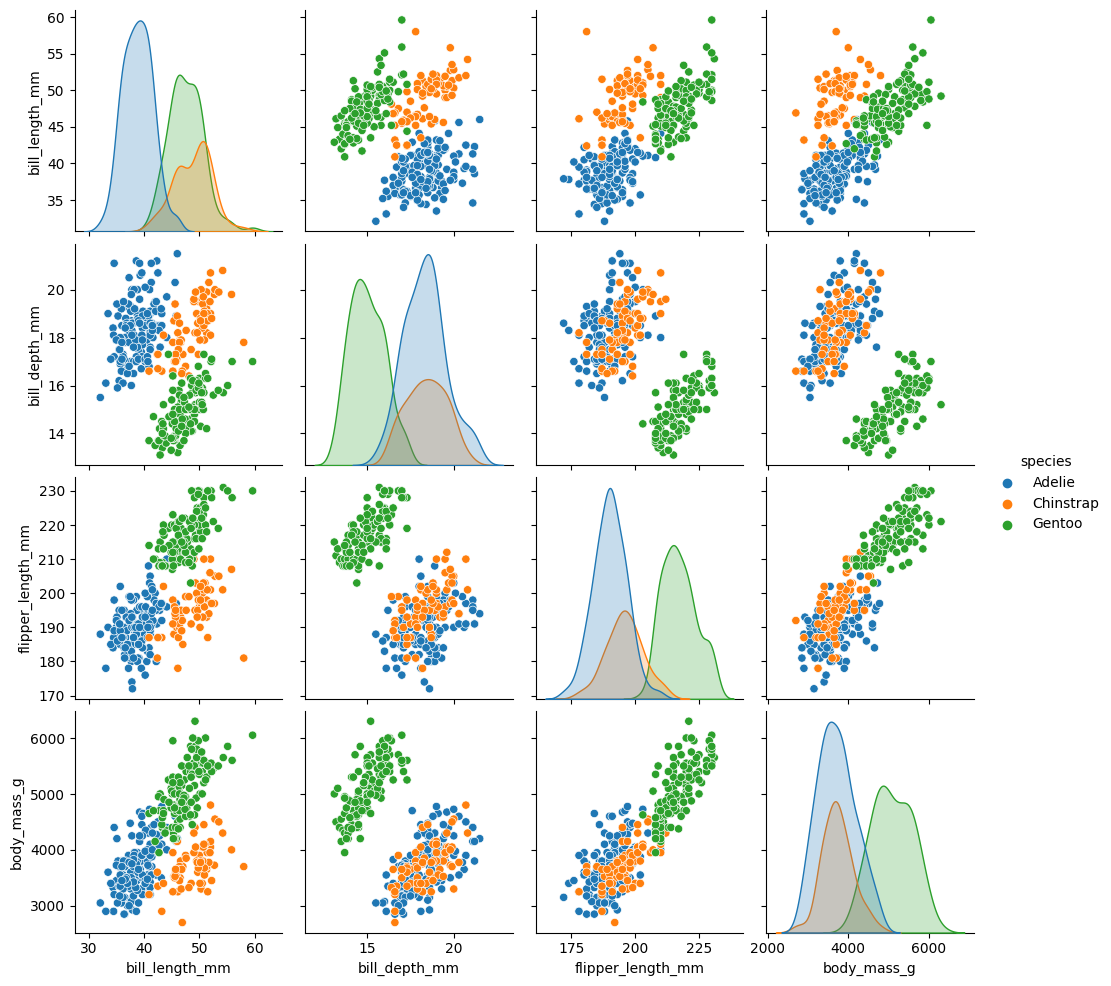

In [47]:
sns.pairplot(penguins, hue='species')

## separação dos datasets em target e features

In [51]:
x = penguins.drop(['species', 'island', 'sex'], axis = 1)
y = penguins['species']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=42, stratify = y)

In [58]:
modelo_logistica = LogisticRegression(multi_class = 'auto', max_iter=1000)
modelo_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
y_pred = modelo_logistica.predict(x_test)

## Matriz de confusão

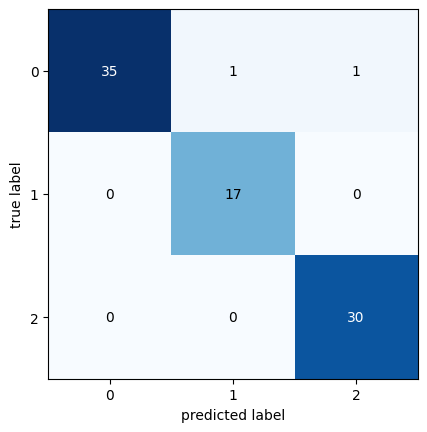

In [60]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        37
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [ ]:
## Precisão é VERTICAL
## Revocação é HORIZONTAL

## Exercicio

In [62]:
iris = sns.load_dataset('iris')

In [63]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
